In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

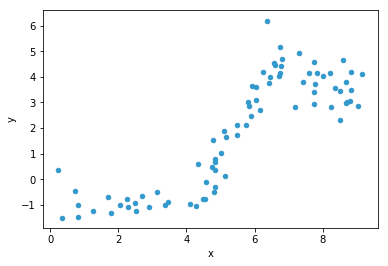

In [111]:
columns = ['x', 'y']
df = pd.read_csv('curve80.csv', sep=",", header=None,  names = columns)
df.plot.scatter(x = 'x', y = 'y', color="#3399CC")

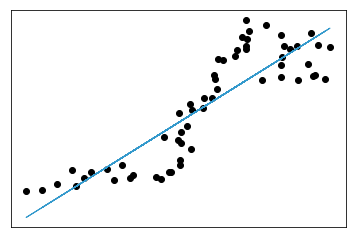

In [112]:
# Split the data into training/testing sets
X_train = x[:-20]
X_test = x[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, regr.predict(X_train), color='#3399CC', linewidth=1)
plt.xticks(())
plt.yticks(())
plt.show()

In [113]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [0.83606916]
Mean squared error: 2.24
Variance score: 0.55


In [114]:
# Computing cross-validated metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

alphas = np.logspace(-4, -0.5, 30)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0)
k_fold = KFold(5)

for k, (train, test) in enumerate(k_fold.split(x, y)):
    lasso_cv.fit(X_train, y_train)
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X_test, y_test)))
print()

[fold 0] alpha: 0.18139, score: 0.57448
[fold 1] alpha: 0.18139, score: 0.57448
[fold 2] alpha: 0.18139, score: 0.57448
[fold 3] alpha: 0.18139, score: 0.57448
[fold 4] alpha: 0.18139, score: 0.57448

